# Gradient Boosting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import sklearn
from  sklearn import tree


X = np.array([1,2,3])
Y = np.array([1,0,2])

def gbp(X, Y, rounds=3, L=1, show_trees=False, show_results=False):
    from tabulate import tabulate

    lx = len(X)
    X = X.reshape(lx,1)
    d = pd.DataFrame({'X':X.reshape(lx,), 'Y':Y})



    pred_y = Y.mean()
    e = Y-pred_y
    n=300

    Xtest = np.linspace(-20,20,n).reshape(-1,1)
    ytest = np.repeat(pred_y, n)

    d['Pred1']=pred_y
    d['e1']=e

    rounds = rounds - 1
    for w in range(rounds):
        stp = DecisionTreeRegressor(max_depth=1).fit(X,e)
        p = stp.predict(X)
        e = e - L*p 

        pred_y = pred_y + L*p
        ytest = ytest + L*stp.predict(Xtest)
        
        if(show_trees):
            plt.figure()
            tree.plot_tree(stp) 
            
        d['Pred%d'%(w+2)] =  p
        d['e%d'%(w+2)]=e

    d['Pred_Final']=pred_y
    d['e_final']=pred_y-Y

    print('')
    print(tabulate(pd.DataFrame({'X':X.reshape(lx,), 'Y':Y, 'Prediction':np.around(pred_y, decimals=3)}), 
          headers=['X', 'Y', 'Prediction'], tablefmt='github'))

    print('')
    
    plt.figure()
    plt.plot(Xtest, ytest)
    plt.scatter(X,Y)
    plt.show()
    r2 = 1-(np.sum(d['e_final']**2))/np.sum((d['Y']-d['Y'].mean())**2)
    print('')
    print('MSE:', np.around(np.sum((pred_y-Y)**2)/len(Y), decimals=3))
    print('R2:', np.around(r2, decimals=3))
    
    if(show_results):
        print('')
        d = d.iloc[:,:-1]
        print(tabulate(d, headers=d.columns, tablefmt='github'))


def gbp_l(X, Y, rounds=3, L=1, show_trees=False):
    # demonstrate learning rate
    from tabulate import tabulate

    lx = len(X)
    X = X.reshape(lx,1)
    d = pd.DataFrame({'X':X.reshape(lx,), 'Y':Y})



    pred_y = Y.mean()
    e = Y-pred_y
    n=300

    Xtest = np.linspace(0,20,n).reshape(-1,1)
    ytest = np.repeat(pred_y, n)

    d['Pred1']=pred_y
    d['e1']=e

    rounds = rounds - 1
    for w in range(rounds):
        stp = DecisionTreeRegressor(max_depth=1).fit(X,e)
        p = stp.predict(X)
        e = e - L*p 

        pred_y = pred_y + L*p
        ytest = ytest + L*stp.predict(Xtest)
            
        d['Pred%d'%(w+2)] =  p
        d['e%d'%(w+2)]=e

    d['Pred_Final']=pred_y
    d['e_final']=pred_y-Y
    
    print('')
    d = d.iloc[:,:-1]
    print(tabulate(d, headers=d.columns, tablefmt='github'))


def gbp2(X, Y, rounds_max=50, L_list=[.1, 1, 2]):
    lx = len(X)
    X = X.reshape(lx,1)
    d = pd.DataFrame({'X':X.reshape(lx,), 'Y':Y})

    ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','MSE', 'R2']))

    for rounds in range(1, rounds_max):
        for L in L_list:

            pred_y = Y.mean()
            e = Y-pred_y
#             n=300
#             Xtest = np.linspace(0,20,n).reshape(-1,1)
#             ytest = np.repeat(pred_y, n)

            d['Pred1']=pred_y
            d['e1']=e

            rounds = rounds - 1
            for w in range(rounds):
                stp = DecisionTreeRegressor(max_depth=1).fit(X,e)
                p = stp.predict(X)
                e = e - L*p 

                pred_y = pred_y + L*p
#                 ytest = ytest + L*stp.predict(Xtest)
                d['Pred%d'%(w+2)] =  p
                d['e%d'%(w+2)]=e

            d['Pred_Final']=pred_y
            d['e_final']=pred_y-Y
            ms = np.mean(d['e_final']**2)
            r2 = 1-np.sum(d['e_final']**2)/np.sum((d['Y']-d['Y'].mean())**2)
            ac = ac.append(pd.DataFrame([[rounds, L, ms, r2]], 
                                        columns=list(['Rounds','Learning Rate','MSE', 'R2'])), ignore_index=True)

    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt
    ax = sns.lineplot(x="Rounds", y="MSE", hue =ac['Learning Rate'].astype('category'),data=ac)
    plt.figure()
    ax = sns.lineplot(x="Rounds", y="R2", hue =ac['Learning Rate'].astype('category'),data=ac)

## 1. Graph, MSE and R2

C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d['e%d'%(w+2)]=e
C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d['Pred%d'%(w+2)] =  p
C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd


|    |   X |   Y |   Prediction |
|----|-----|-----|--------------|
|  0 |   1 |   1 |       -1.667 |
|  1 |   3 |   0 |       -1.667 |
|  2 |   5 |   7 |       11.333 |



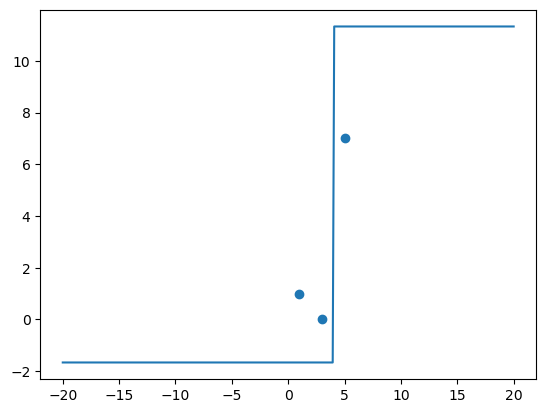


MSE: 9.556
R2: 0.0


In [2]:
X = np.array([1,3,5])
Y = np.array([1,0,7])

gbp(X, Y, rounds=1000, L=2, show_trees=False, show_results=False)

C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()



|    |   X |   Y |   Prediction |
|----|-----|-----|--------------|
|  0 |   1 |   1 |        0.999 |
|  1 |   3 |   0 |        0.003 |
|  2 |   5 |   7 |        6.998 |



C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d['e%d'%(w+2)]=e
C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d['Pred_Final']=pred_y
C:\Users\snguyen4\AppData\Local\Temp\ipykernel_8588\1363725782.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

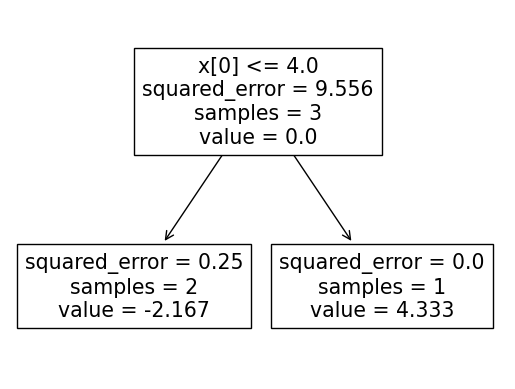

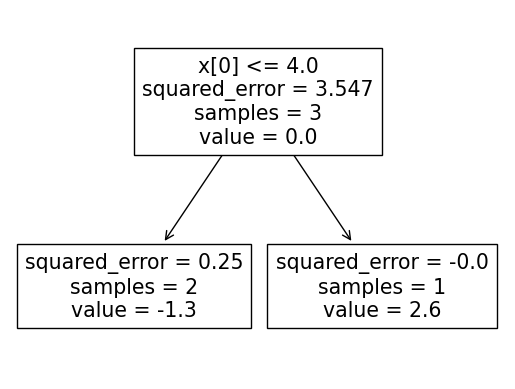

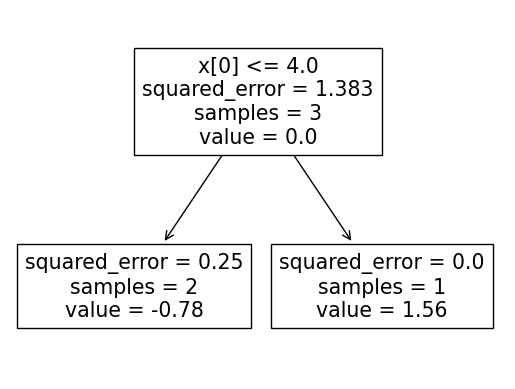

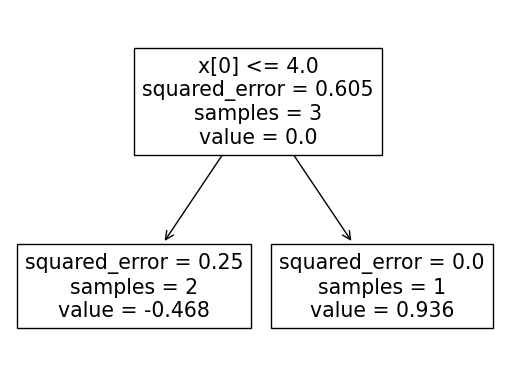

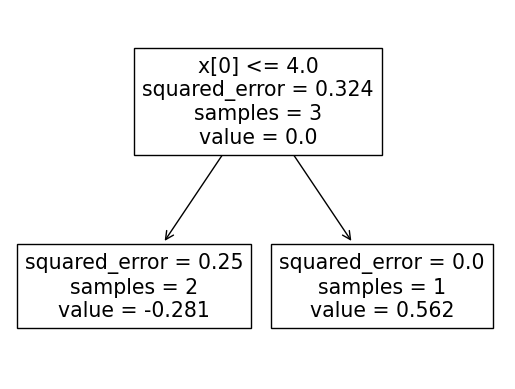

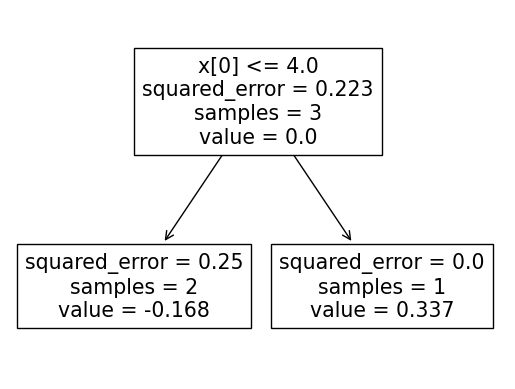

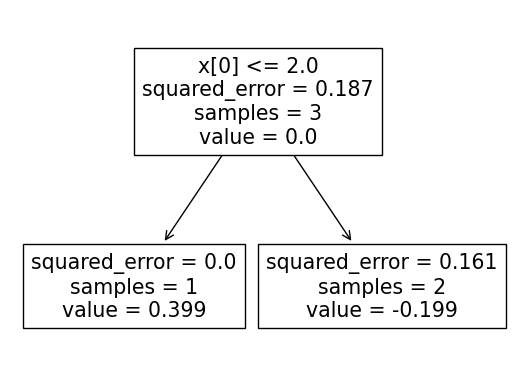

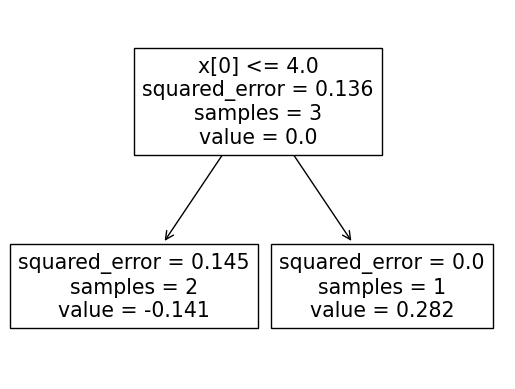

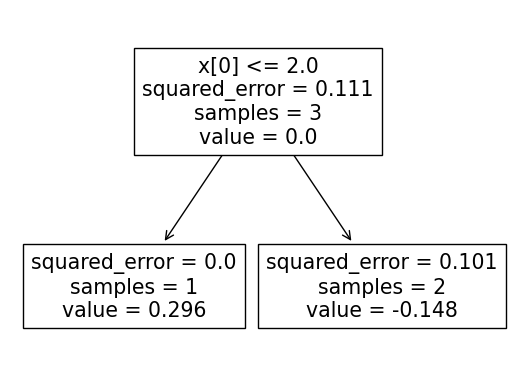

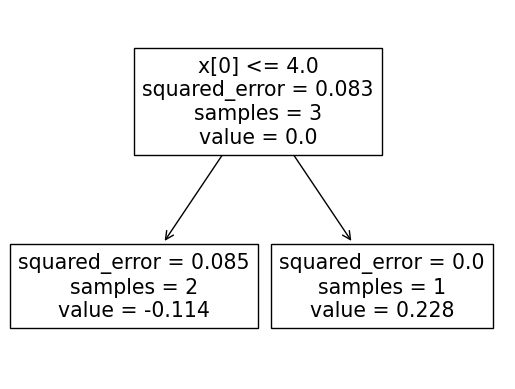

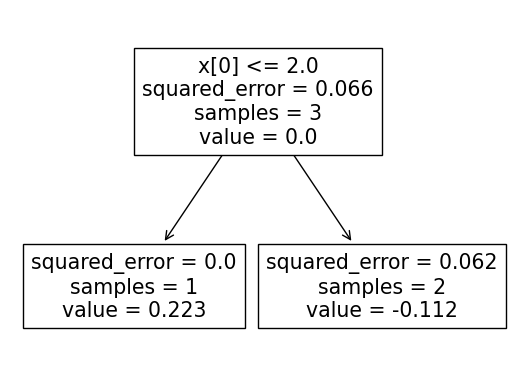

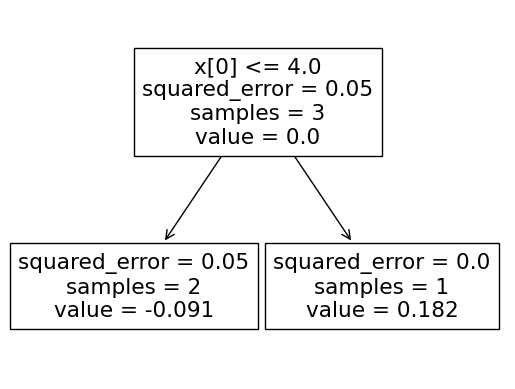

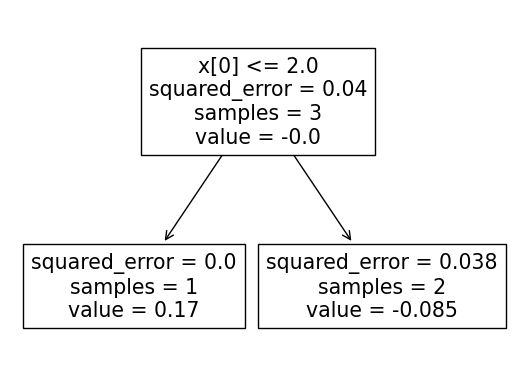

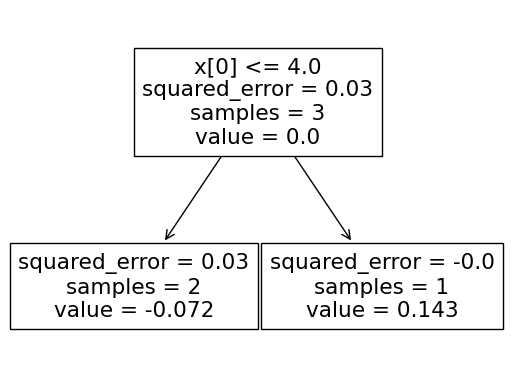

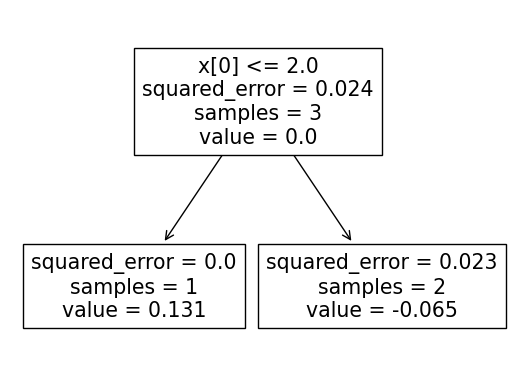

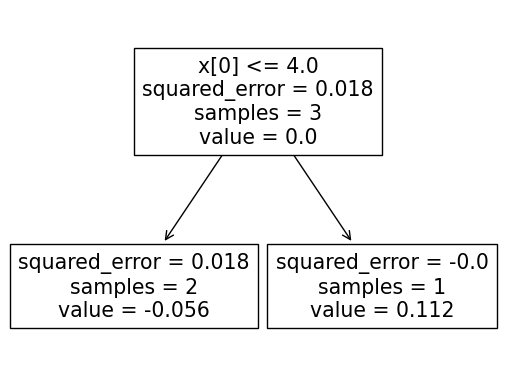

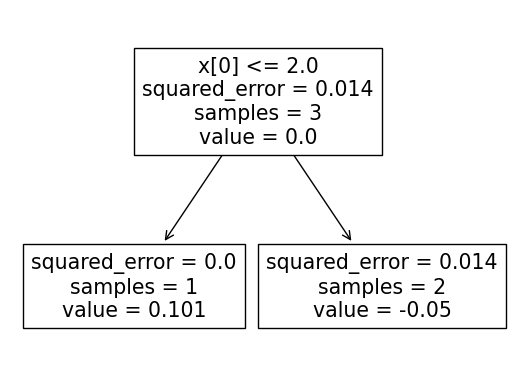

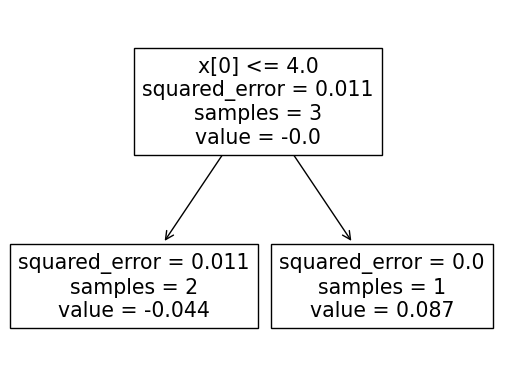

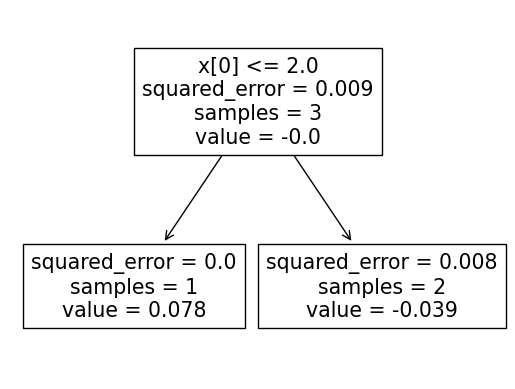

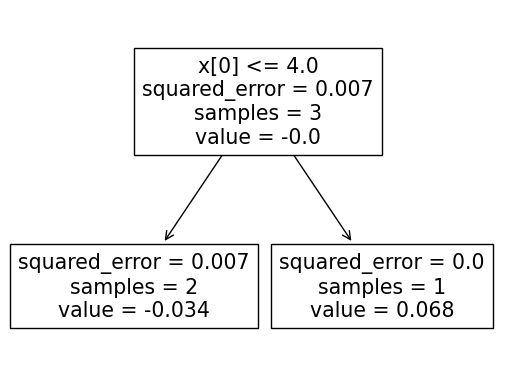

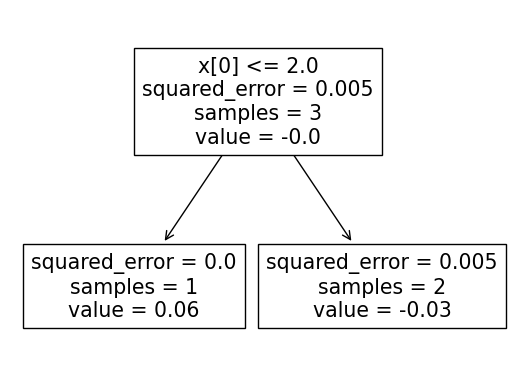

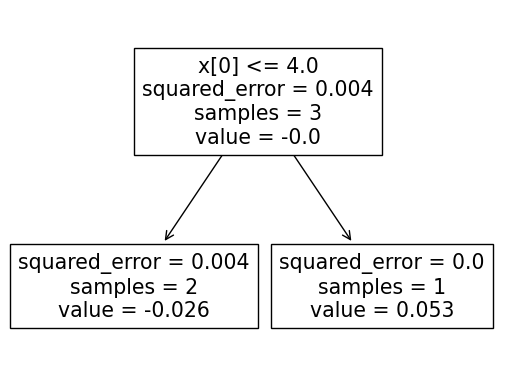

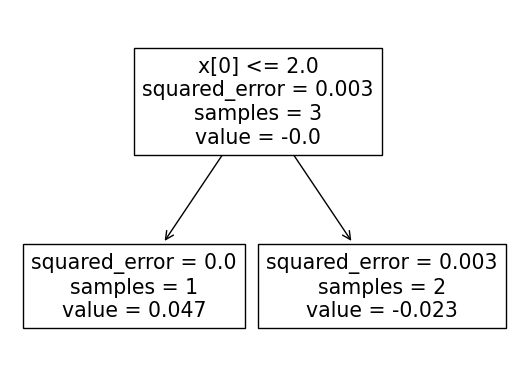

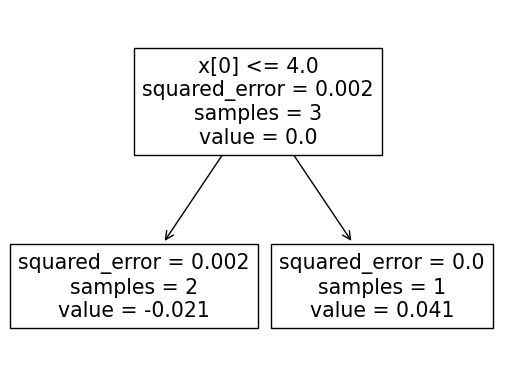

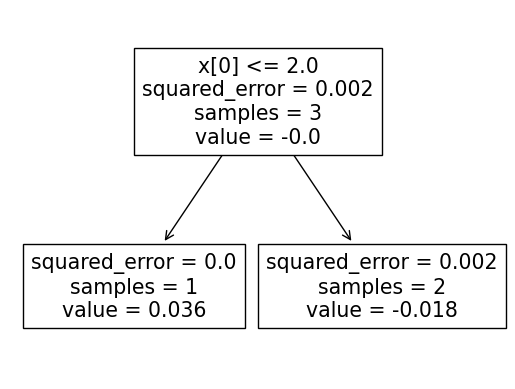

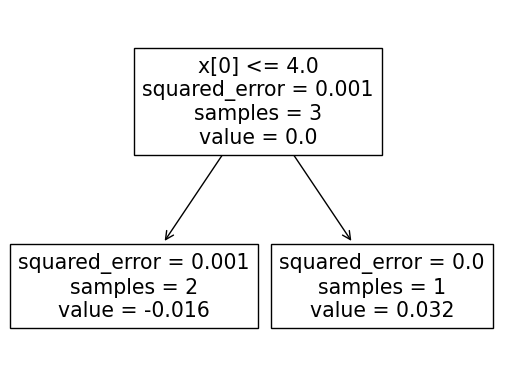

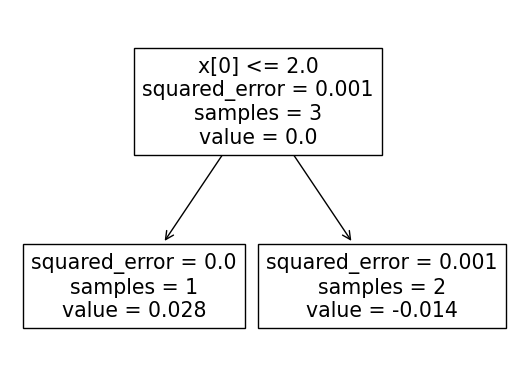

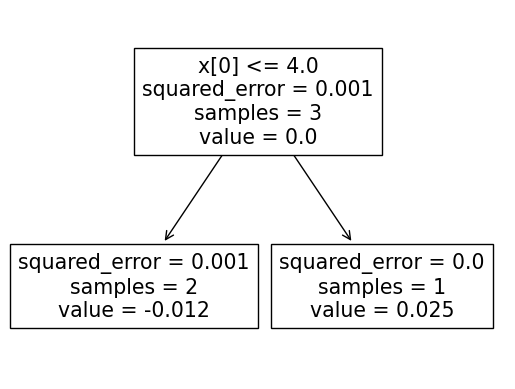

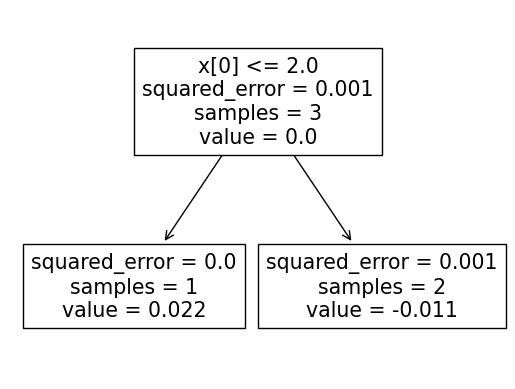

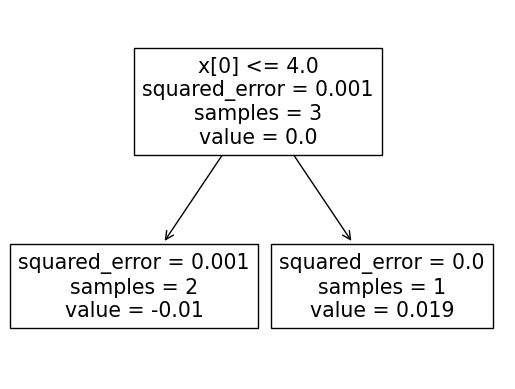

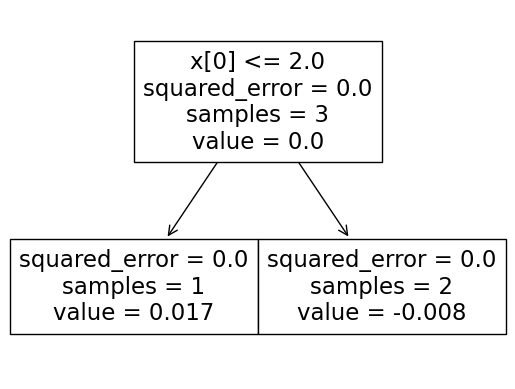

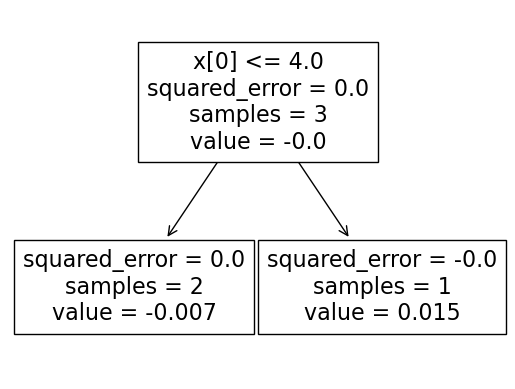

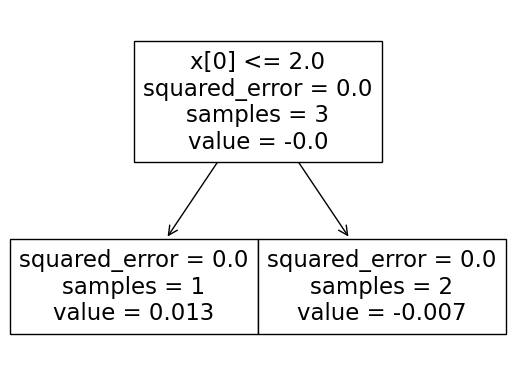

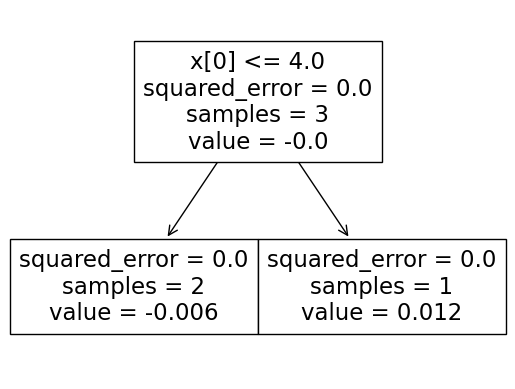

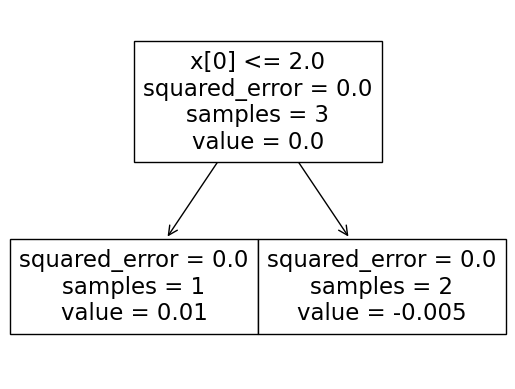

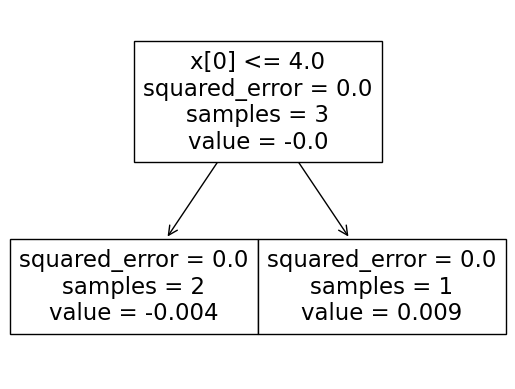

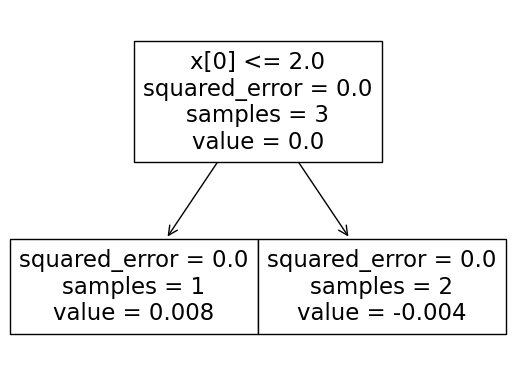

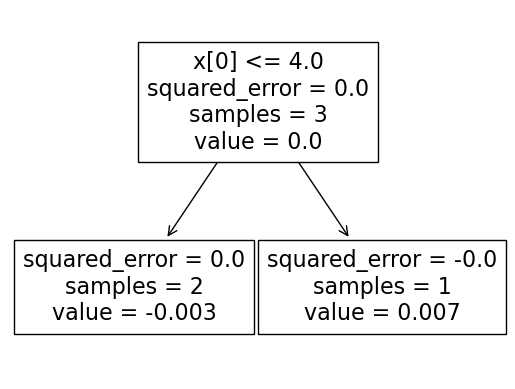

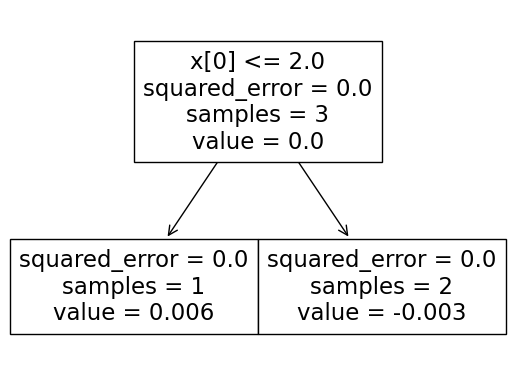

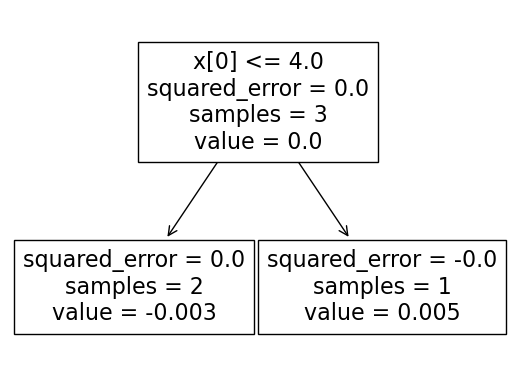

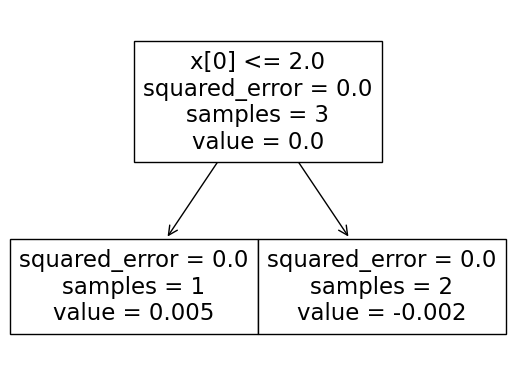

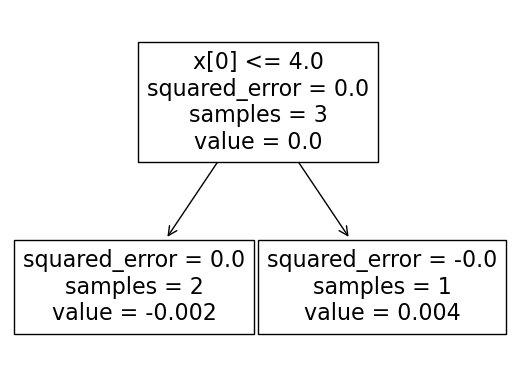

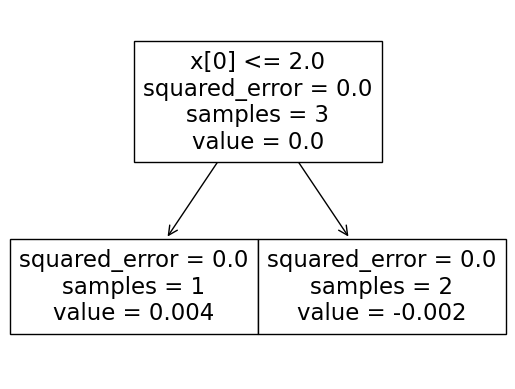

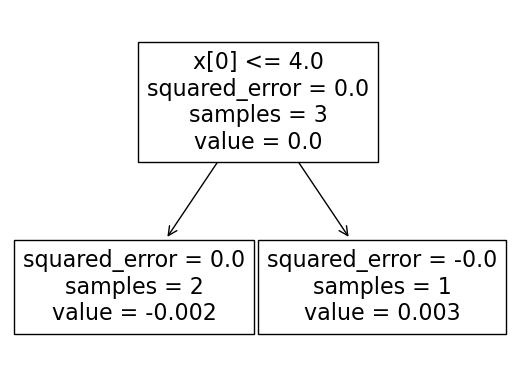

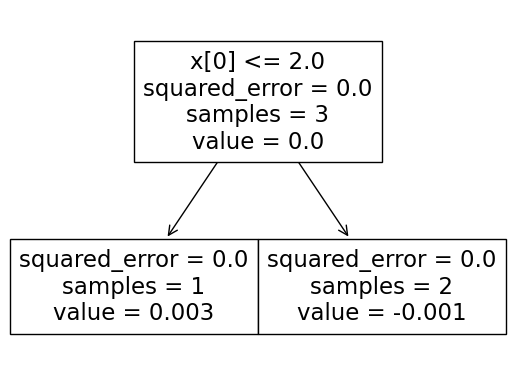

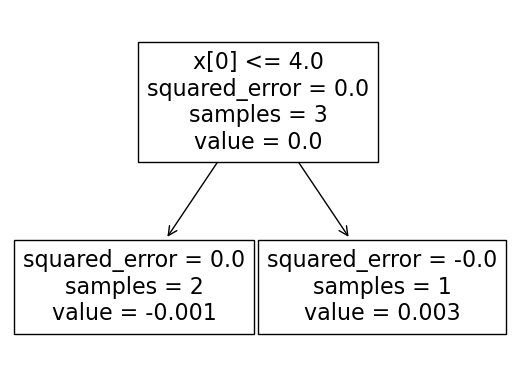

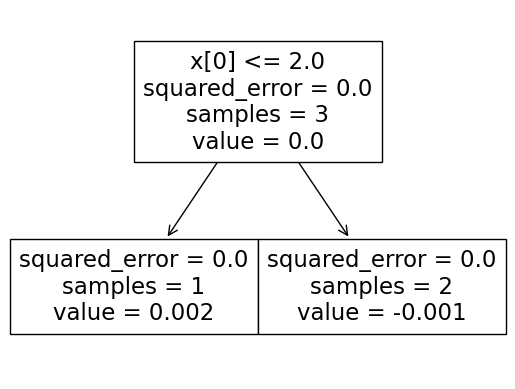

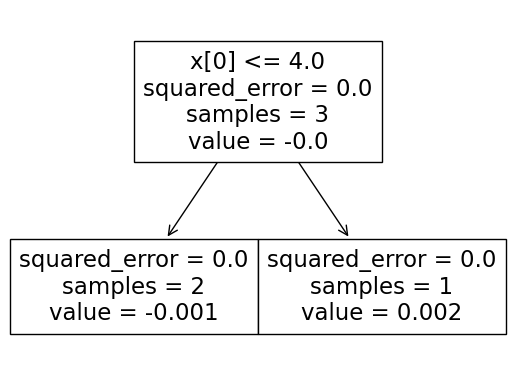

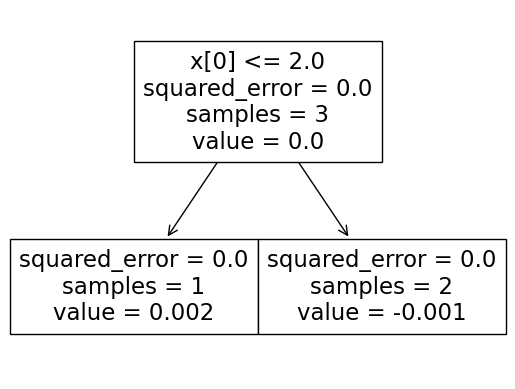

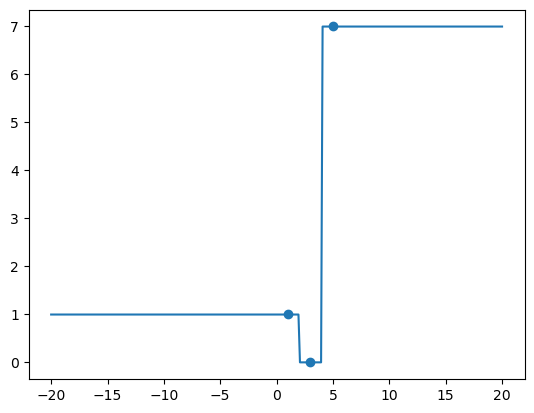


MSE: 0.0
R2: 1.0

|    |   X |   Y |   Pred1 |       e1 |    Pred2 |   e2 |   Pred3 |    e3 |   Pred4 |     e4 |   Pred5 |      e5 |   Pred6 |       e6 |    Pred7 |        e7 |     Pred8 |        e8 |     Pred9 |        e9 |    Pred10 |       e10 |    Pred11 |       e11 |    Pred12 |       e12 |     Pred13 |       e13 |     Pred14 |       e14 |     Pred15 |       e15 |    Pred16 |        e16 |     Pred17 |        e17 |     Pred18 |        e18 |     Pred19 |       e19 |     Pred20 |        e20 |     Pred21 |        e21 |     Pred22 |        e22 |     Pred23 |        e23 |     Pred24 |        e24 |     Pred25 |        e25 |     Pred26 |        e26 |     Pred27 |        e27 |     Pred28 |        e28 |    Pred29 |        e29 |    Pred30 |        e30 |     Pred31 |        e31 |      Pred32 |        e32 |      Pred33 |         e33 |      Pred34 |         e34 |      Pred35 |        e35 |      Pred36 |         e36 |      Pred37 |         e37 |      Pred38 |         e38 |      Pred39 |        

In [22]:
X = np.array([1,3,5])
Y = np.array([1,0,7])

gbp(X, Y, rounds=50, L=.4, show_trees=True, show_results=True)

## 2. What is learning rate in Gradient Boosting?

In [4]:
import numpy as np
X = np.array([1,3,5])
Y = np.array([1,0,7])

print('')
print('Learning Rate 1')
gbp_l(X, Y, rounds=3, L=1)
print('')
print('')
print('Learning Rate .1')
gbp_l(X, Y, rounds=3, L=.1)
print('')
print('')


Learning Rate 1

|    |   X |   Y |   Pred1 |       e1 |    Pred2 |   e2 |   Pred3 |    e3 |   Pred_Final |
|----|-----|-----|---------|----------|----------|------|---------|-------|--------------|
|  0 |   1 |   1 | 2.66667 | -1.66667 | -2.16667 |  0.5 |    0.5  |  0    |         1    |
|  1 |   3 |   0 | 2.66667 | -2.66667 | -2.16667 | -0.5 |   -0.25 | -0.25 |         0.25 |
|  2 |   5 |   7 | 2.66667 |  4.33333 |  4.33333 |  0   |   -0.25 |  0.25 |         6.75 |


Learning Rate .1

|    |   X |   Y |   Pred1 |       e1 |    Pred2 |    e2 |   Pred3 |     e3 |   Pred_Final |
|----|-----|-----|---------|----------|----------|-------|---------|--------|--------------|
|  0 |   1 |   1 | 2.66667 | -1.66667 | -2.16667 | -1.45 |   -1.95 | -1.255 |        2.255 |
|  1 |   3 |   0 | 2.66667 | -2.66667 | -2.16667 | -2.45 |   -1.95 | -2.255 |        2.255 |
|  2 |   5 |   7 | 2.66667 |  4.33333 |  4.33333 |  3.9  |    3.9  |  3.51  |        3.49  |




## 3. Effect of Number of Rounds and Learning Rate

In [5]:
gbp2(X, Y, rounds_max=30, L_list=[.1, 1, 1.5])

AttributeError: 'DataFrame' object has no attribute 'append'

## Data

In [ ]:
X = np.array([1,2,3])
Y = np.array([1,2,4])

gbp(X, Y, rounds=3, show_trees=False)

In [ ]:
gbp2(X, Y, rounds_max=30, L_list=[.1, .5, 1, 2])

# Titanic Data

### Predicting Survived

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import GradientBoostingClassifier
r1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print('Testing Accuracy: ', r1.score(x_test, y_test))

### Variable Importance


In [ ]:
sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

### Learning Rate

In [ ]:
ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(1, 1000):
    for lr in [.5, 1]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Training Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

### Predicting Age

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')

df = df[df['Age'].notna()]

# Assign input variables
X = df.loc[:,['Pclass','Sex','Fare','Embarked','SibSp','Parch','Survived']]

# Assign target variable
y = df['Age']

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)
X['Survived'] = X['Survived'].astype(object)
# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import GradientBoostingRegressor
r1 = GradientBoostingRegressor()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))

### Variable Importance

In [ ]:
sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)


### Learning Rate

In [ ]:
ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(1, 100):
    for lr in [.5, 1]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Import the data
df = pd.read_csv('breast_cancer.csv')

# Assign input variables
X = df.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

# Assign target variable
y = df['diagnosis']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(1, 100):
    for lr in [.1, 2]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_train,y_train) ]], 
                                    columns=list(['Rounds','Learning Rate','Training Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

In [ ]:
ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(1, 100):
    for lr in [.1, 2]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_test,y_test) ]], 
                                    columns=list(['Rounds','Learning Rate','Testing Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Testing Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)